In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [4]:
df = pd.read_csv("C:/Users/al142367/Downloads/Hitters.csv")

In [6]:
df = df.dropna().drop('Player', axis = 1)

In [11]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [29]:
X = df['Salary'].values.reshape(-1,1)
y = df.drop(columns=['Salary', 'League','Division','NewLeague'])

In [26]:
alphas = 10**np.linspace(10, -2, 100)
alphas

array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+07, 2.15443469e+07, 1.62975083e+07,
       1.23284674e+07, 9.32603347e+06, 7.05480231e+06, 5.33669923e+06,
       4.03701726e+06, 3.05385551e+06, 2.31012970e+06, 1.74752840e+06,
       1.32194115e+06, 1.00000000e+06, 7.56463328e+05, 5.72236766e+05,
       4.32876128e+05, 3.27454916e+05, 2.47707636e+05, 1.87381742e+05,
       1.41747416e+05, 1.07226722e+05, 8.11130831e+04, 6.13590727e+04,
       4.64158883e+04, 3.51119173e+04, 2.65608778e+04, 2.00923300e+04,
       1.51991108e+04, 1.14975700e+04, 8.69749003e+03, 6.57933225e+03,
       4.97702356e+03, 3.76493581e+03, 2.84803587e+03, 2.15443469e+03,
      

In [31]:
ridge = Ridge()

coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 16, 1)

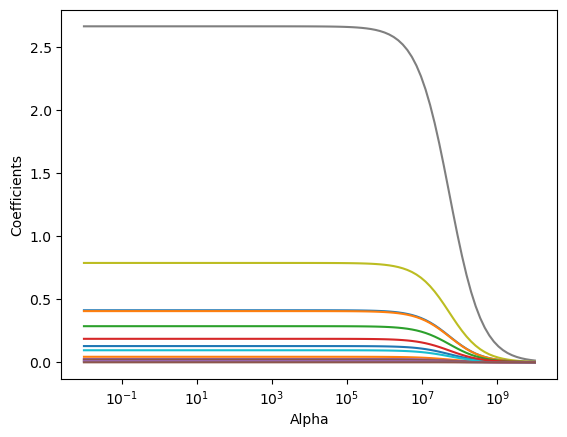

In [36]:
coefs = np.array(coefs)

coefs = coefs.reshape(-1, 16)

fig, ax = plt.subplots()

# Plot the data
ax.plot(alphas, coefs)

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Add labels
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficients')

# Display the plot
plt.show()


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

In [39]:
ridge2 = Ridge(alpha = 4)

ridge2.fit(X_train, y_train)

pred2 = ridge2.predict(X_test)

print(ridge2.coef_)

[[ 1.21211946e-01]
 [ 4.30056755e-02]
 [ 5.69135949e-03]
 [ 2.24400828e-02]
 [ 2.70102859e-02]
 [ 2.21588552e-02]
 [ 3.87956999e-03]
 [ 2.43714804e+00]
 [ 7.38226216e-01]
 [ 9.98216055e-02]
 [ 3.76547771e-01]
 [ 4.16717785e-01]
 [ 2.61718098e-01]
 [ 2.79869501e-01]
 [-2.25658168e-03]
 [ 3.62058221e-04]]


In [41]:
print(pd.Series(ridge2.coef_, index = X.columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [42]:
print(mean_squared_error(y_test, pred2))

261834.4575540349


In [44]:
ridge3 = Ridge(alpha = 10**10)

ridge3.fit(X_train, y_train)

pred3 = ridge3.predict(X_test)

print(ridge3.coef_)

print(pd.Series(ridge3.coef_, index = X.columns))

[[ 3.68620761e-04]
 [ 1.30785664e-04]
 [ 1.73081394e-05]
 [ 6.82431117e-05]
 [ 8.21416737e-05]
 [ 6.73878632e-05]
 [ 1.17982599e-05]
 [ 7.41167346e-03]
 [ 2.24503869e-03]
 [ 3.03570047e-04]
 [ 1.14512909e-03]
 [ 1.26729115e-03]
 [ 7.95917624e-04]
 [ 8.51118324e-04]
 [-6.86254847e-06]
 [ 1.10106455e-06]]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [45]:
print(mean_squared_error(y_test, pred3))

366355.7668025955


In [47]:
ridge4 = Ridge(alpha = 0)

ridge4.fit(X_train, y_train)

pred4 = ridge2.predict(X_test)

print(ridge4.coef_)


print(mean_squared_error(y_test, pred4))

[[ 1.21211962e-01]
 [ 4.30056812e-02]
 [ 5.69136024e-03]
 [ 2.24400857e-02]
 [ 2.70102894e-02]
 [ 2.21588581e-02]
 [ 3.87957050e-03]
 [ 2.43714836e+00]
 [ 7.38226313e-01]
 [ 9.98216186e-02]
 [ 3.76547820e-01]
 [ 4.16717839e-01]
 [ 2.61718132e-01]
 [ 2.79869538e-01]
 [-2.25658198e-03]
 [ 3.62058268e-04]]
261834.4575540349


In [52]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas = alphas)

ridgecv.fit(X_train, y_train)

ridgecv.alpha_

2310129.700083158

In [53]:
ridge5 = Ridge(alpha = 2310129.700083158)

ridge5.fit(X_train, y_train)

pred5 = ridge5.predict(X_test)

print(ridge5.coef_)

print(mean_squared_error(y_test, pred5))

[[ 1.12678590e-01]
 [ 3.99780634e-02]
 [ 5.29068612e-03]
 [ 2.08602944e-02]
 [ 2.51087539e-02]
 [ 2.05988653e-02]
 [ 3.60644713e-03]
 [ 2.26557210e+00]
 [ 6.86254874e-01]
 [ 9.27941352e-02]
 [ 3.50038698e-01]
 [ 3.87380730e-01]
 [ 2.43293067e-01]
 [ 2.60166606e-01]
 [-2.09771767e-03]
 [ 3.36569216e-04]]
264299.536170463


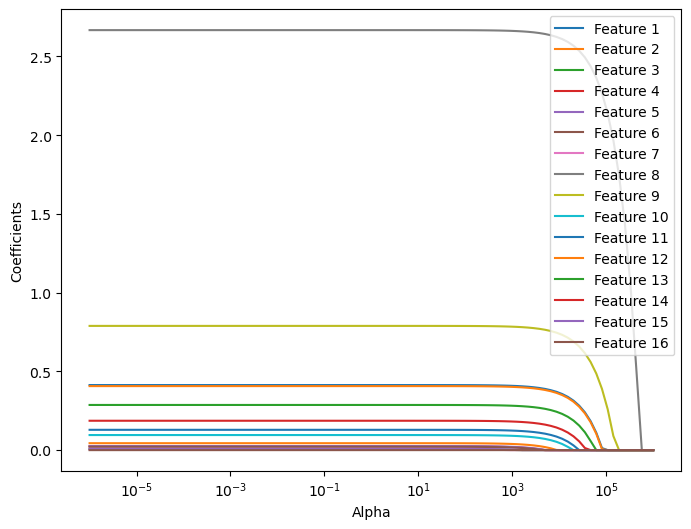

In [60]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

#LASSO

# Example data and alphas
alphas = np.logspace(-6, 6, 100)  # Example alphas
coefs = []

# Assuming you have the dataset and X, y defined somewhere
# for each alpha value, fit a Lasso model and store coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# Convert coefs list to a numpy array for proper plotting
coefs = np.array(coefs)

# Now plot, adjusting the axes to avoid dimension mismatch
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the coefficients for each feature
for i in range(coefs.shape[1]):  # Iterate over each feature's coefficient
    ax.plot(alphas, coefs[:, i], label=f"Feature {i+1}")

ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficients')
ax.legend(loc='best')
plt.show()


In [65]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas = alphas)

lasso.fit(X_train, y_train)

mean_squared_error(y_test, lasso.predict(X_test))

366903.77647291025

In [ ]:
pd